In [8]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import scipy.io as sio

In [10]:

##In case you were wondering how I prepared the data
"""
#load data

#data source: https://finance.yahoo.com/quote/%5EGSPC/history/

weeks_after_start = []
dewtemp = []

f = open('localweather.csv')
header = f.readline()
idx = header.split(',').index('HourlyDewPointTemperatureC')
startdate = None
line = f.readline()

while len(line) > 0:
    splitline = line.split(',')
    
    #load day
    dt = splitline[5].split(' ')
    d = dt[0].split('-')
    t = dt[1].split(':')
    
    d = int(d[0]),int(d[1]),int(d[2])    
    t = int(t[0]), int(t[1])
    d = datetime.datetime(year=d[0],month=d[1],day=d[2], hour=t[0],minute=d[1])
    if startdate is None:
        startdate = copy.deepcopy(d)
    
    if  len(splitline[idx].strip('')) == 0: 
        line = f.readline()
        continue
    weeks_after_start.append((d - startdate).seconds/( 24 * 60 * 60*7 +0.) + (d-startdate).days/7.)
    
    dewtemp.append(float(splitline[idx]))

    line = f.readline()

weeks_after_start, dewtemp = np.array(weeks_after_start), np.array(dewtemp)
plt.plot(weeks_after_start, dewtemp)

plt.xlabel('Weeks after first reading')
plt.ylabel('Dew point temp (C)')
plt.tight_layout()
plt.savefig('polyfit_hw1_0.png')
plt.savefig('polyfit_hw1_0.eps')
N = len(weeks_after_start)

sio.savemat('weatherDewTmp.mat',{'weeks':weeks_after_start,'dew':dewtemp})
print N
"""



"\n#load data\n\n#data source: https://finance.yahoo.com/quote/%5EGSPC/history/\n\nweeks_after_start = []\ndewtemp = []\n\nf = open('localweather.csv')\nheader = f.readline()\nidx = header.split(',').index('HourlyDewPointTemperatureC')\nstartdate = None\nline = f.readline()\n\nwhile len(line) > 0:\n    splitline = line.split(',')\n    \n    #load day\n    dt = splitline[5].split(' ')\n    d = dt[0].split('-')\n    t = dt[1].split(':')\n    \n    d = int(d[0]),int(d[1]),int(d[2])    \n    t = int(t[0]), int(t[1])\n    d = datetime.datetime(year=d[0],month=d[1],day=d[2], hour=t[0],minute=d[1])\n    if startdate is None:\n        startdate = copy.deepcopy(d)\n    \n    if  len(splitline[idx].strip('')) == 0: \n        line = f.readline()\n        continue\n    weeks_after_start.append((d - startdate).seconds/( 24 * 60 * 60*7 +0.) + (d-startdate).days/7.)\n    \n    dewtemp.append(float(splitline[idx]))\n\n    line = f.readline()\n\nweeks_after_start, dewtemp = np.array(weeks_after_start),

742


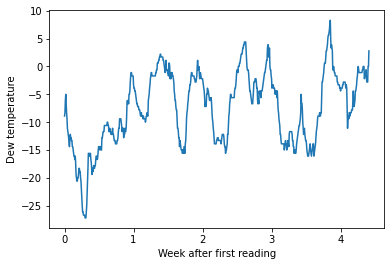

In [11]:
#This cell forms the mat file you were already given
data = sio.loadmat('weatherDewTmp.mat')
weeks_after_start = data['weeks'][0]
dewtemp = data['dew'][0]
N = len(dewtemp)
plt.plot(weeks_after_start, dewtemp)
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
print(N)

Check number:  1.3412701796105337


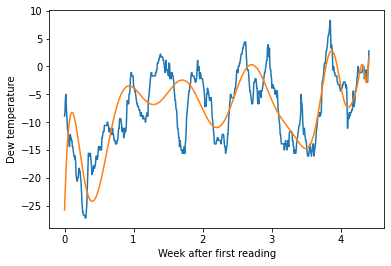

MSE: 21.56288204329945


In [12]:
def packX(z,poly_order):
    z = np.array(z)
#     print(z)
    X = np.zeros((len(z),poly_order+1))
    for i in range(poly_order+1):
        X[:,i] = z**i
#     print(X)
    return X


def solveLinearSystem(X,y):
    xtx = np.dot(X.T, X)
    xty = np.dot(X.T, y)
    
#     xtx += 0.000001
#     print(xtx)
#     xty += 0.000001
#     print(xtx)
    theta = np.linalg.solve(xtx, xty)
    return theta

# TEST SCRIPT. DO NOT MODIFY!
X = packX(range(100),3)
y = np.sqrt(np.array(range(100)))
theta = solveLinearSystem(X,y)
print('Check number: ', np.sum(theta))

def get_mse(yhat, y):
    return np.sum((yhat-y)**2)/len(y)

X = packX(weeks_after_start, 100)
theta = solveLinearSystem(X, dewtemp)

# print(theta)

plt.plot(weeks_after_start, dewtemp)

y = []
for x in weeks_after_start:
    total=0
    for i in range(len(theta)):
        total += theta[i] * (x**i)
    y.append(total)
plt.plot(weeks_after_start, y)


plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')

plt.show()

print("MSE:", get_mse(y, dewtemp))

Check number:  1.2061712965226048


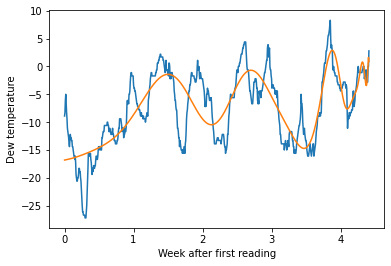

MSE: 16.96923386290458


In [13]:


def solveRidgeRegressionSystem(X,y,rho):
    xtx = np.dot(X.T, X)
    rho_i = rho * np.identity(len(xtx))
    xtx_rho_i = xtx + rho_i
    
    xty = np.dot(X.T, y)

    theta = np.linalg.solve(xtx_rho_i, xty)
    return theta

# TEST SCRIPT. DO NOT MODIFY!
X = packX(range(100),3)
y = np.sqrt(np.array(range(100)))
theta = solveRidgeRegressionSystem(X,y,1)
print('Check number: ', np.sum(theta))

X = packX(weeks_after_start, 100)
theta = solveRidgeRegressionSystem(X, dewtemp, 1)

# print(theta)

plt.plot(weeks_after_start, dewtemp)

y = []
for x in weeks_after_start:
    total=0
    for i in range(len(theta)):
        total += theta[i] * (x**i)
    y.append(total)
plt.plot(weeks_after_start, y)


plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')

plt.show()

print("MSE:", get_mse(y, dewtemp))

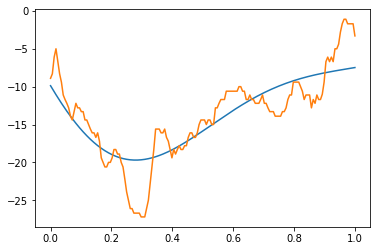

In [21]:
p = 100
rho = 0.01

X = packX(weeks_after_start, p)
theta = solveRidgeRegressionSystem(X, dewtemp, rho)

yhat = np.dot(X,theta)

one_week = weeks_after_start[data['weeks'][0] <= 1]

forecast = []
actual = dewtemp[data['weeks'][0]<=1]
for i in range(len(weeks_after_start)):
    if weeks_after_start[i] in one_week:
        forecast.append(yhat[i])
plt.plot(one_week, forecast, label='forecasted')
plt.plot(one_week, actual, label='actual')
plt.show()